In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [1]:
import pandas as pd
data = pd.read_csv("data/Mall_Customers.csv")

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
X = data.iloc[:, [3, 4]].values  

In [9]:
from sklearn.cluster import KMeans

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Clusters={n}, Silhouette Score={score}")

Clusters=2, Silhouette Score=0.39564531743995546
Clusters=3, Silhouette Score=0.46761358158775435
Clusters=4, Silhouette Score=0.4937945814354117
Clusters=5, Silhouette Score=0.553931997444648
Clusters=6, Silhouette Score=0.5128405328004378
Clusters=7, Silhouette Score=0.5017174409749505
Clusters=8, Silhouette Score=0.4962769338093321
Clusters=9, Silhouette Score=0.45587414130065596
Clusters=10, Silhouette Score=0.4426214845978157


In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

### Cluster Interpretation
- **Cluster 1 (High Income, High Spending)** → Target Customers (Luxury Shoppers)
- **Cluster 2 (High Income, Low Spending)** → Careful Spenders
- **Cluster 3 (Low Income, High Spending)** → Impulsive Buyers
- **Cluster 4 (Low Income, Low Spending)** → Budget Customers
- **Cluster 5 (Middle Income, Middle Spending)** → Average Customers

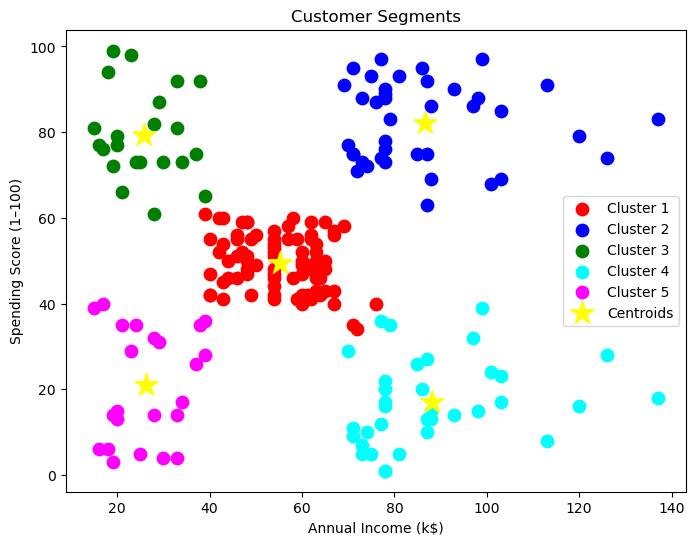

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()

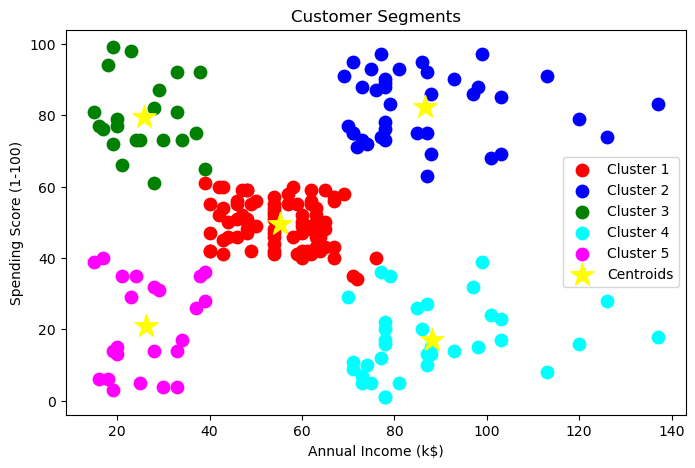

In [24]:
plt.figure(figsize=(8,5))

# Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='magenta', label='Cluster 5')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

# Titles and labels
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

# Save before show
plt.savefig("images/cluster.png", dpi=300, bbox_inches='tight')
plt.show()

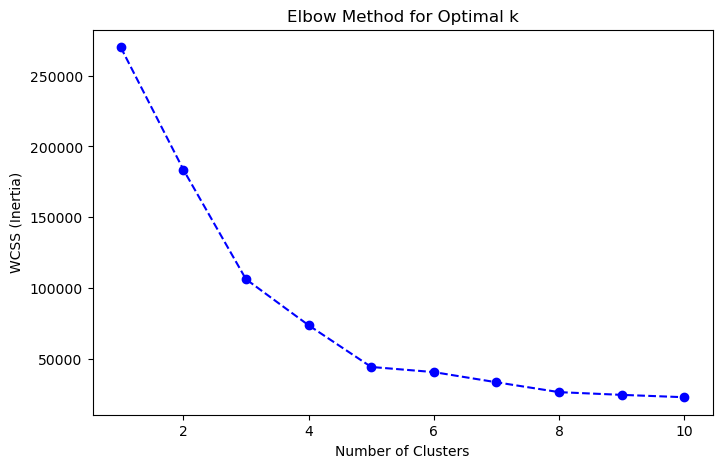

In [12]:
# Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

Clusters=2, Silhouette Score=0.396
Clusters=3, Silhouette Score=0.468
Clusters=4, Silhouette Score=0.494
Clusters=5, Silhouette Score=0.554
Clusters=6, Silhouette Score=0.513
Clusters=7, Silhouette Score=0.502
Clusters=8, Silhouette Score=0.496
Clusters=9, Silhouette Score=0.456
Clusters=10, Silhouette Score=0.443


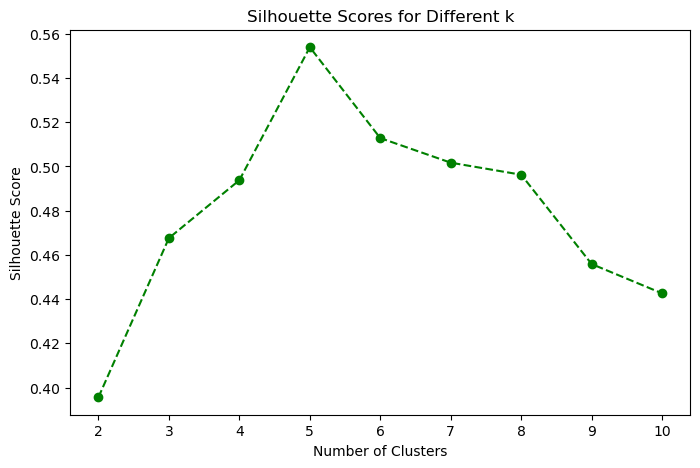

In [13]:
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Clusters={n}, Silhouette Score={score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# 🛍 Customer Segmentation using K-Means Clustering

## 📌 Problem Statement
The goal of this project is to apply *unsupervised learning (K-Means Clustering)* to segment customers of a mall based on their *Annual Income* and *Spending Score*.  
The objective is to identify distinct customer groups that can help businesses design targeted marketing strategies.

---

## 📂 Data Overview
- *Dataset*: Mall_Customers.csv
- *Features*:
  - CustomerID → Unique identifier (not used for clustering)
  - Gender → Male/Female (not used in this task)
  - Age → Customer age
  - Annual Income (k$) → Customer’s annual income
  - Spending Score (1-100) → Score assigned by the mall based on customer behavior
- *Selected Features for Clustering*:  
  - Annual Income (k$)  
  - Spending Score (1-100)  

---

## ⚙ Model Summary

### 🔹 Step 1: Feature Selection
- Extracted only *Annual Income* and *Spending Score* for clustering.

### 🔹 Step 2: Finding Optimal Clusters
- Used *Elbow Method* and *Silhouette Score* to determine the best number of clusters.
- Observed that *5 clusters* gave the best balance of compactness and separation.

### 🔹 Step 3: K-Means Clustering
- Applied *KMeans(n_clusters=5, init="k-means++", random_state=42)*.
- Obtained 5 distinct customer groups.

---

## 📊 Graphs & Visualizations
1. *Elbow Method Plot* → Shows the optimal number of clusters where inertia starts flattening.  
2. *Silhouette Scores* → Compared scores for clusters 2–10, confirming 5 as the best choice.  
3. *Cluster Visualization*:
   - Scatter plot of customers segmented into 5 clusters.
   - Centroids marked with yellow stars.
   - Each cluster color-coded for clarity.

---

## 💡 Insights & Interpretation

- *Cluster 1 (High Income, High Spending)* → 💎 Target Customers / Luxury Shoppers  
- *Cluster 2 (High Income, Low Spending)* → 🧐 Careful Spenders  
- *Cluster 3 (Low Income, High Spending)* → 🎉 Impulsive Buyers  
- *Cluster 4 (Low Income, Low Spending)* → 💸 Budget Customers  
- *Cluster 5 (Middle Income, Average Spending)* → 🙂 Average Customers  

### ✅ Conclusion
- K-Means successfully segmented customers into *5 meaningful groups*.  
- These insights can help businesses:
  - Focus premium offers on *Cluster 1* (Luxury Shoppers).  
  - Provide discounts to *Cluster 3* (Impulsive Buyers) to increase loyalty.  
  - Design budget-friendly campaigns for *Cluster 4*.  
- This segmentation demonstrates the power of *unsupervised learning* in real-world marketing strategies.